In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("./bank-additional-full.csv", delimiter = ";")

In [3]:
df.shape


(41188, 21)

In [8]:
df_dummies = pd.get_dummies(df)

In [9]:
df_dummies.shape


(41188, 65)

In [10]:
del df_dummies["duration"]

In [11]:
del df_dummies["y_no"]

In [12]:
df_dummies.shape

(41188, 63)

In [13]:
outcome = ["y_yes"]

In [18]:
y_df = df_dummies[outcome]

In [16]:
df_dummy_copy = df_dummies.copy()

In [17]:
del df_dummy_copy["y_yes"]

In [20]:
x_df = df_dummy_copy

In [22]:
y = y_df.values.T[0]

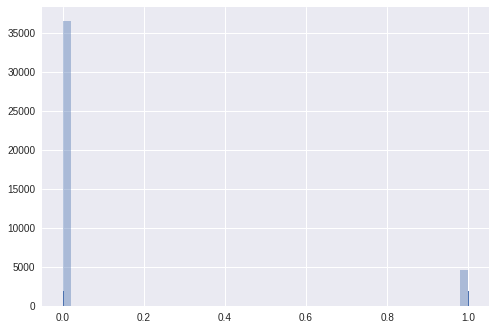

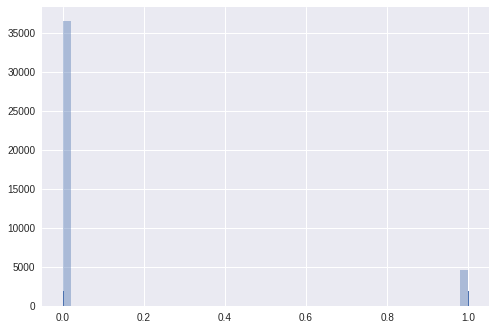

In [25]:
sns.distplot(y, kde=False, rug=True).get_figure()

In [29]:
X = x_df.values

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators = 2000,max_depth = 4)

dummy_clf = DummyClassifier()
scores = cross_val_score(clf, X, y, cv=10,scoring = make_scorer(acc))

dummy_clf.fit(X,y)

print("ACC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f")% (acc(y,dummy_clf.predict(X)))

ACC: 0.84 (+/- 0.11)
Dummy ACC: 0.80


In [31]:
clf_random = RandomForestClassifier(n_estimators = 1000, max_depth=4)
scores_random = cross_val_score(clf_random, X, y, cv=4,scoring = make_scorer(acc))

In [32]:
print("ACC: %0.2f (+/- %0.2f)" % (scores_random.mean(), scores_random.std()))

ACC: 0.71 (+/- 0.30)


In [33]:
clf.fit(X,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=4, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=2000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [34]:
feature_series = x_df.columns

In [36]:
features = feature_series.tolist()

[ 2 61  8  7  4 60  6 49  5 50 42 52 43  3 59 53 33 48  0 44 34 14 10 17 47
 51 46 45 55 27 31 23  1 22 56 57 58 54 16  9 32 20 28 21 11 39 15 25 26 36
 18 41 30 38 37 19 12 40 24 13 29 35]
Feature ranking:
1. pdays (0.180206)
2. poutcome_success (0.156737)
3. nr.employed (0.138618)
4. euribor3m (0.129528)
5. emp.var.rate (0.085441)
6. poutcome_nonexistent (0.040471)
7. cons.conf.idx (0.031528)
8. month_mar (0.026952)
9. cons.price.idx (0.024707)
10. month_may (0.024484)
11. contact_cellular (0.022986)
12. month_oct (0.020512)
13. contact_telephone (0.019549)
14. previous (0.012623)
15. poutcome_failure (0.012392)
16. month_sep (0.012187)
17. default_no (0.007056)
18. month_jun (0.005754)
19. age (0.005745)
20. month_apr (0.005365)
21. default_unknown (0.005266)
22. job_retired (0.005258)
23. job_blue-collar (0.004621)
24. job_student (0.004364)
25. month_jul (0.002722)
26. month_nov (0.002482)
27. month_dec (0.002321)
28. month_aug (0.001542)
29. day_of_week_mon (0.001502)
30. educati

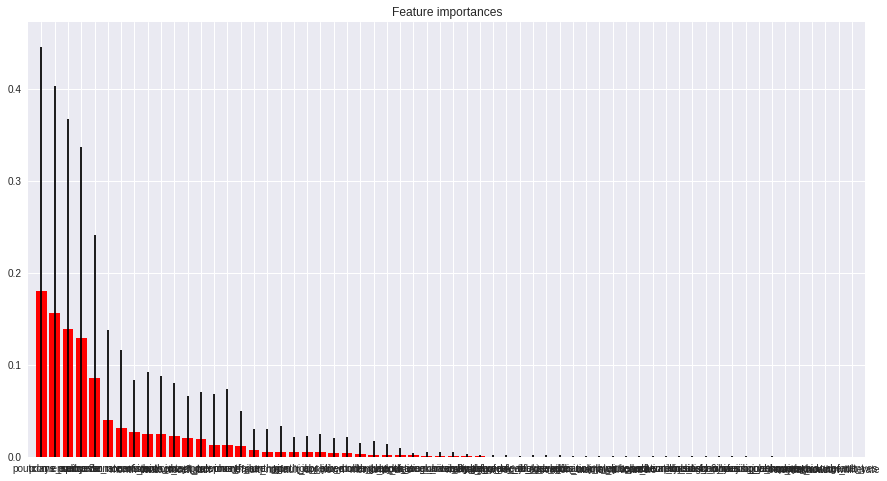

In [38]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print indices
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

plt.savefig("importances.png",bbox_inches='tight')
plt.savefig("importances.pdf",bbox_inches='tight')

In [39]:
std

array([  2.74425550e-02,   2.66513954e-03,   2.65869842e-01,
         5.51499467e-02,   1.56231734e-01,   6.75551134e-02,
         8.48976875e-02,   2.07638053e-01,   2.28619801e-01,
         1.21634890e-03,   1.53363461e-02,   6.57994419e-04,
         2.37135993e-04,   1.90183462e-04,   1.94549247e-02,
         4.44887240e-04,   1.39271294e-03,   1.76449891e-02,
         4.15903374e-04,   3.65784290e-04,   6.91803491e-04,
         4.69807266e-04,   2.07973287e-03,   3.99903252e-03,
         1.73945674e-04,   5.33589332e-04,   5.23790383e-04,
         3.80626900e-03,   7.39430438e-04,   2.81910501e-04,
         3.81212152e-04,   4.30505205e-03,   1.05276654e-03,
         2.27971097e-02,   1.71821688e-02,   0.00000000e+00,
         3.98747243e-04,   2.65770025e-04,   3.34543846e-04,
         4.03853728e-04,   2.10829874e-04,   3.82518448e-04,
         5.72850467e-02,   5.03915516e-02,   1.59235380e-02,
         8.14699401e-03,   1.12243755e-02,   1.19156923e-02,
         2.46652914e-02,

Normalized confusion matrix


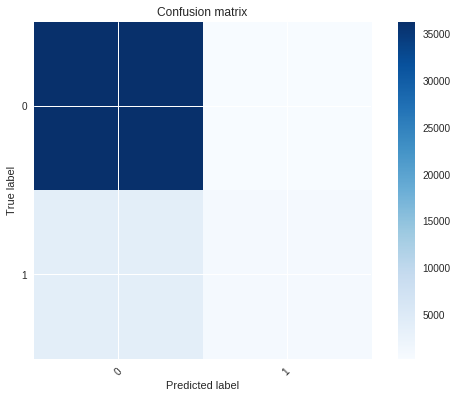

In [40]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
        #print t
#         plt.text(j, i, t,
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
y_pred = clf.predict(X)
cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y))), normalize = True,
                      title='Confusion matrix')

plt.savefig("confusion.png",bbox_inches='tight')
plt.savefig("confusion.pdf",bbox_inches='tight')